In [1]:
!wget -qnc -P ./usda_food https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/usda_food/database.json

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:

import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [5]:
db = json.load(open("C:/Users/THCHN-WS-035/Case study/Case study 6_USD Food Analytics/database.json"))

In [6]:
len(db)

6636

In [7]:
type(db)

list

In [8]:
type(db[0])

dict

In [9]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [10]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [12]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients = nutrients[["description","group","units","value"]]

In [13]:
nutrients.head(10)

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00
7,"Fiber, total dietary",Composition,g,0.00
8,"Calcium, Ca",Elements,mg,673.00
9,"Iron, Fe",Elements,mg,0.64


In [16]:
info_keys = ['description','group','id','manufacturer']
info = pd.DataFrame(db,columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [17]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


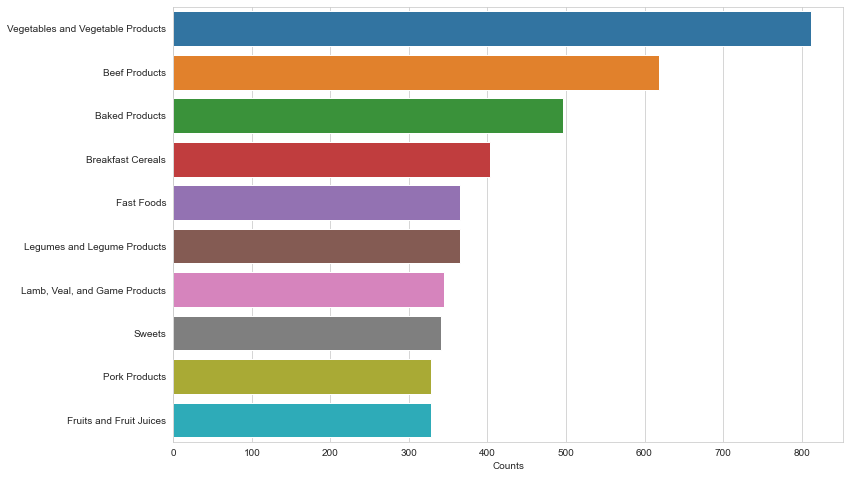

In [18]:

plt.figure(figsize=(12, 8))
_ = sns.barplot(x=pd.value_counts(info.group)[:10], y=pd.value_counts(info.group)[:10].index)
_ = plt.xlabel("Counts")

In [19]:
# for analysis of nutrients

nutrients = []

for i in db:
    fnuts = pd.DataFrame(i["nutrients"])
    fnuts['id'] = i["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [20]:
nutrients = nutrients[["description", "group", "units", "value", "id"]]
nutrients.head(10)

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008
5,Water,Composition,g,39.28,1008
6,Energy,Energy,kJ,1573.00,1008
7,"Fiber, total dietary",Composition,g,0.00,1008
8,"Calcium, Ca",Elements,mg,673.00,1008
9,"Iron, Fe",Elements,mg,0.64,1008


In [21]:

nutrients.duplicated().sum()

14179

In [22]:
nutrients = nutrients.drop_duplicates()

In [23]:
col_mapping = {'description' : 'food', 
               'group' : 'fgroup'}

In [34]:
info = info.rename(columns=col_mapping, copy=False)

In [35]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [26]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [27]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   description   375176 non-null  object 
 1   group         375176 non-null  object 
 2   units         375176 non-null  object 
 3   value         375176 non-null  float64
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [30]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result.index.values

KeyError: 'nutrient'

In [29]:
ndata.iloc[30000]

description                                    Glycine
group                                      Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [36]:
result = ndata.groupby(['nutrients', 'fgroup'])['value'].quantile(0.5)
result.index.values

KeyError: 'nutrients'

In [33]:
col_mapping = {'description': 'nutrient',
               'group': 'nutgroup'}

In [37]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   description   375176 non-null  object 
 1   group         375176 non-null  object 
 2   units         375176 non-null  object 
 3   value         375176 non-null  float64
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [38]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [39]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   description   375176 non-null  object 
 1   group         375176 non-null  object 
 2   units         375176 non-null  object 
 3   value         375176 non-null  float64
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [40]:
ndata.iloc[30000]

description                                    Glycine
group                                      Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object